In [6]:
%load_ext autoreload
%autoreload 2
from generators import SynthBooleanMatrix, DiagBooleanMatrix, ArbiBooleanMatrix
from utils.display import show_matrix
from copy import deepcopy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# for all
n_row=200
n_col=100
k=5
noise=0.1
seed=1024

# for synth
density=0.15

# for diag
overlap=[0.2, 0.1, 0.2, 0.1]

# for arbi
overlap_flag=True
size_range=[0.5, 1.0, 0.5, 1.0]


### 0. Testing `display.show_matrix`

`display.show_matrix` is a simple tool to visualize matrices side-by-side.

`settings` is a list of tuples, formatted as (matrix, location, description).

The scaling in `show_matrix` can be set in 2 ways:

- By setting `scaling=1.0`, it rescales automatically for you to generate a plot that fit the size of your screen. This is more intuitive when using a pop-up window for display. `scaling=0.5` is 50% of the optimal size.

- By setting `pixels=5`, it displays each cell in the plot with a 5-by-5-pixels block. This will overwrite the scaling settings.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1024


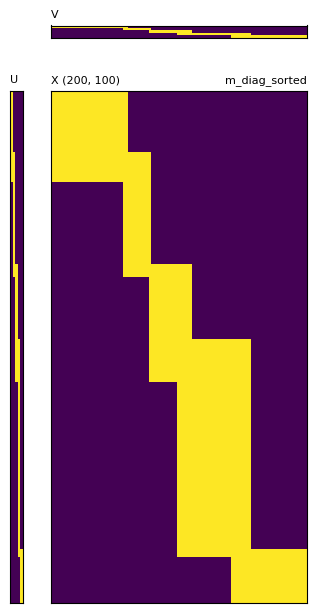

In [8]:
# testing display.show_matrix

m_diag_sorted = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
m_diag_sorted.generate(seed=seed) # if no seed assigned, use time instead

settings = [(m_diag_sorted.U, [1, 0], "U"),
            (m_diag_sorted.V, [0, 1], "V"),
            (m_diag_sorted.X, [1, 1], "X " + str(m_diag_sorted.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="m_diag_sorted") # setting 1: half the height of your screen

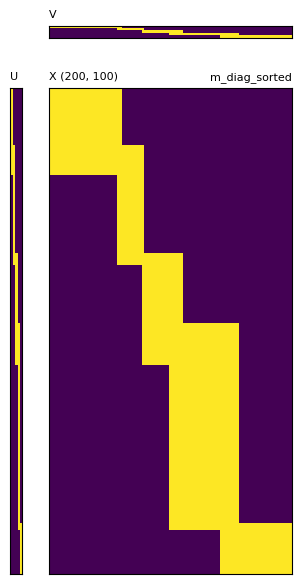

In [9]:
show_matrix(settings=settings, pixels=5, title="m_diag_sorted") # setting 2: 5x5 pixels for a cell

### 1. Diagonal Boolean matrix

This generates a diagonal Boolean matrix which can lated be matrix-wise shuffled, factor-wise shuffled or noised.

Since a diagonal Boolean matrix comes with continuous-1's property (C1P) by nature, we can see the index before matrix-wise shuffling is ordered.

Key settings:

- `overlap` defines how you wish the patterns overlap with each other. `overlap` is formatted as (overlap_u, span_u, overlap_v, span_v).
- In the last example, `overlap=[0.2, 0.1, 0.2, 0.1]` means each bottom-right corner `(x0, y0)` will land within a rectangle `(x1 + (0.2 ± 0.1) * a1, y1 + (0.2 ± 0.1) * b1)`, in which `(x1, y1)` is the coordinate of top-left corner of the next pattern and `a1, b1` is the size of the **next** pattern.
- The overlap_u and overlap_v can be negative, which indicates there's no overlap.
- In the example below, `overlap=[-0.1, 0.1, -0.1, 0.1]` means each bottom-right corner `(x0, y0)` will land within a rectangle `(x1 + (-0.1 ± 0.1) * a0, y1 + (-0.1 ± 0.1) * b0)`, in which `a0, b0` is the size of the **current** pattern.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap      : [-0.1  0.1 -0.1  0.1]
[I] seed         : 1024


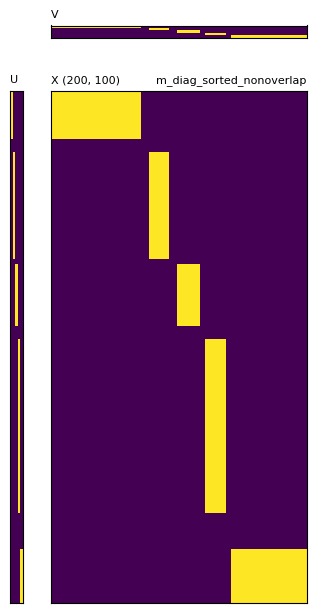

In [10]:
# negative overlap means no overlap

m_diag_sorted_nonoverlap = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=[-0.1, 0.1, -0.1, 0.1])
m_diag_sorted_nonoverlap.generate(seed=seed) # if no seed assigned, use time instead

settings = [(m_diag_sorted_nonoverlap.U, [1, 0], "U"),
            (m_diag_sorted_nonoverlap.V, [0, 1], "V"),
            (m_diag_sorted_nonoverlap.X, [1, 1], "X " + str(m_diag_sorted_nonoverlap.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="m_diag_sorted_nonoverlap")

The method `shuffle_factors()` shuffles the columns of U and rows of V to rearrange patterns.

Note that shuffling factors can change the overlapping property. The example below shows how shuffling seperates the overlapped patterns.

[I] seed         : 2048
[I] Using RandomState
[I] Using RandomState


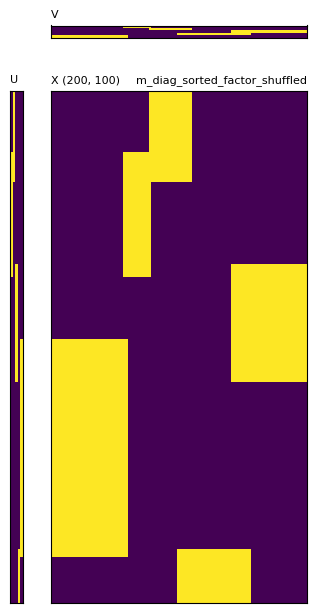

In [11]:
# shuffling factors

m_diag_sorted_factor_shuffled = deepcopy(m_diag_sorted)
m_diag_sorted_factor_shuffled.shuffle_factors(seed=2048) # you can shuffle with a new seed
# new seed will overwrite the random state of the matrix

settings = [(m_diag_sorted_factor_shuffled.U, [1, 0], "U"),
            (m_diag_sorted_factor_shuffled.V, [0, 1], "V"),
            (m_diag_sorted_factor_shuffled.X, [1, 1], "X " + str(m_diag_sorted_factor_shuffled.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="m_diag_sorted_factor_shuffled") 

The method `shuffle()` shuffles the columns and rows of X to disorganize patterns.

Shuffled index will be updated automatically. You can also manually re-assign the indecies to match your need.

[I] seed         : 1024
[I] Using RandomState
[I] Using RandomState


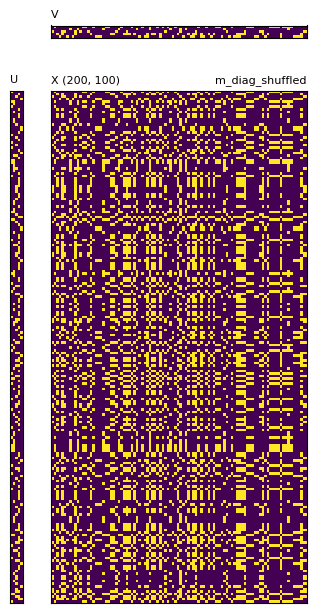

In [12]:
# shuffling the whole matrix

m_diag_shuffled = deepcopy(m_diag_sorted)
m_diag_shuffled.shuffle(seed=seed)

settings = [(m_diag_shuffled.U, [1, 0], "U"),
            (m_diag_shuffled.V, [0, 1], "V"),
            (m_diag_shuffled.X, [1, 1], "X " + str(m_diag_shuffled.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="m_diag_shuffled")

In [17]:
# index before and after shuffling

print(m_diag_sorted.U_idx[:10])
print(m_diag_shuffled.U_idx[:10])

[0 1 2 3 4 5 6 7 8 9]
[  7 176  76 189  26  37  21 159  46 154]


The method `add_noise()` flip the bits of the matrix with probability (p_pos, p_neg).

[I] noise        : [0.1 0.1]
[I] seed         : 1024
[I] Using RandomState


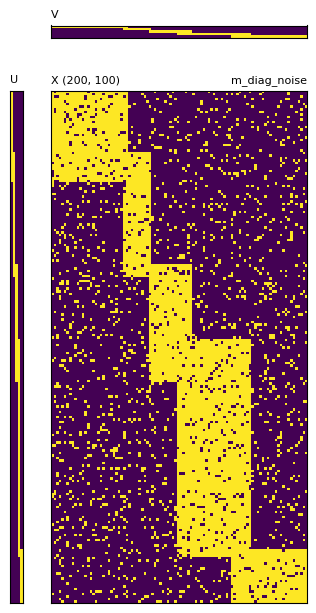

In [18]:
# adding noise

m_diag_noise = deepcopy(m_diag_sorted)
m_diag_noise.add_noise(noise=noise, seed=seed)
settings = [(m_diag_noise.U, [1, 0], "U"),
            (m_diag_noise.V, [0, 1], "V"),
            (m_diag_noise.X, [1, 1], "X " + str(m_diag_noise.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="m_diag_noise") 

### 2. Arbitrary Boolean matrix

This generates an 'arbitrary' Boolean matrix with randomly distributed blocks.

Since an arbitrary Boolean matrix comes with continuous-1's property (C1P) by nature, the index before matrix-wise shuffling is ordered.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.5 1.  0.5 1. ]
[I] seed         : 1692372362


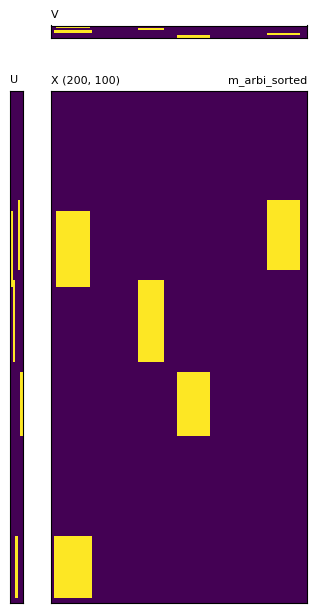

In [22]:
# 'arbitrary' Boolean matrix with randomly distributed blocks

m_arbi_sorted = ArbiBooleanMatrix(m=n_row, n=n_col, k=5, overlap_flag=False, size_range=size_range)
m_arbi_sorted.generate() # if no seed assigned, use time instead

settings = [(m_arbi_sorted.U, [1, 0], "U"),
            (m_arbi_sorted.V, [0, 1], "V"),
            (m_arbi_sorted.X, [1, 1], "X " + str(m_arbi_sorted.X.shape))]
show_matrix(settings=settings, scaling=0.5, title="m_arbi_sorted")

### 3. Synthetic Boolean matrix

This generates a synthetic Boolean matrix which can lated be matrix-wise shuffled, factor-wise shuffled or noised.

Since a diagonal Boolean matrix comes with continuous-1's property (C1P) by nature, we can see the index before matrix-wise shuffling is ordered.

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] density      : [0.15 0.15]
[I] seed         : 1692372366
[I] Using RandomState
[I] Using RandomState


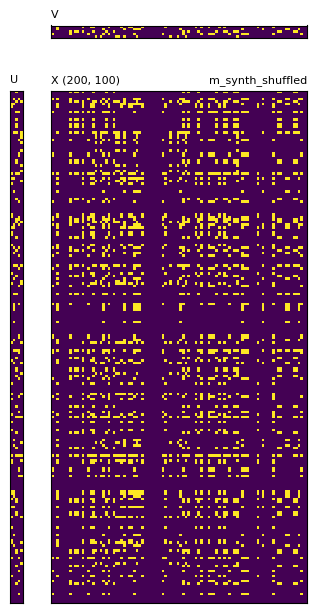

In [23]:
# synthetic Boolean matrix

m_synth_shuffled = SynthBooleanMatrix(m=n_row, n=n_col, k=k, density=density)
m_synth_shuffled.generate()

settings = [(m_synth_shuffled.U, [1, 0], "U"),
            (m_synth_shuffled.V, [0, 1], "V"),
            (m_synth_shuffled.X, [1, 1], "X " + str(m_synth_shuffled.X.shape))]

show_matrix(settings=settings, scaling=0.5, title="m_synth_shuffled")

### 4. Export as a matrix

In [24]:
# save as txt
import numpy as np

m_arbi_sorted = ArbiBooleanMatrix(m=n_row, n=n_col, k=5, overlap_flag=False, size_range=size_range)
m_arbi_sorted.generate() # if no seed assigned, use time instead

# settings = [(m_arbi_sorted.U, [1, 0], "U"),
#             (m_arbi_sorted.V, [0, 1], "V"),
#             (m_arbi_sorted.X, [1, 1], "X " + str(m_arbi_sorted.X.shape))]
# show_matrix(settings=settings, scaling=0.5, title="m_arbi_sorted")

np.savetxt('test.txt', m_arbi_sorted.X.astype(int), fmt='%i')

[I] m            : 200
[I] n            : 100
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.5 1.  0.5 1. ]
[I] seed         : 1692372369
